<a href="https://colab.research.google.com/github/KevZer-ISC/Proyectos-Con-Python/blob/main/Proyecto_Final_NLP_y_CV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CRITERIO 1: FUNCIONALIDAD DEL MODELO IMPLEMENTADO**

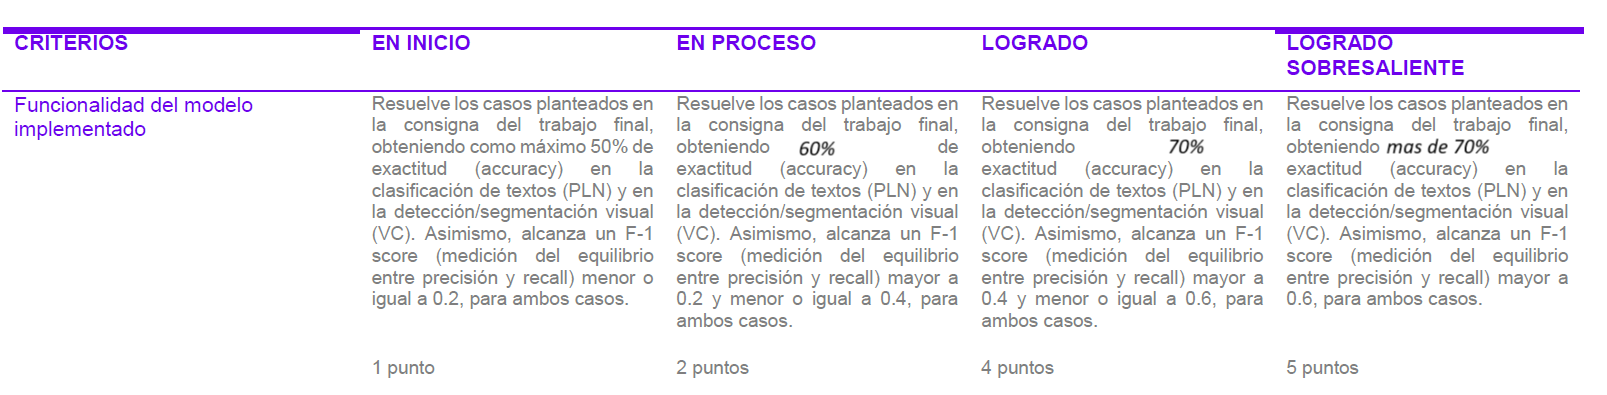

### **CRITERIO 2: EFICIENCIA Y OPTIMIZACION**

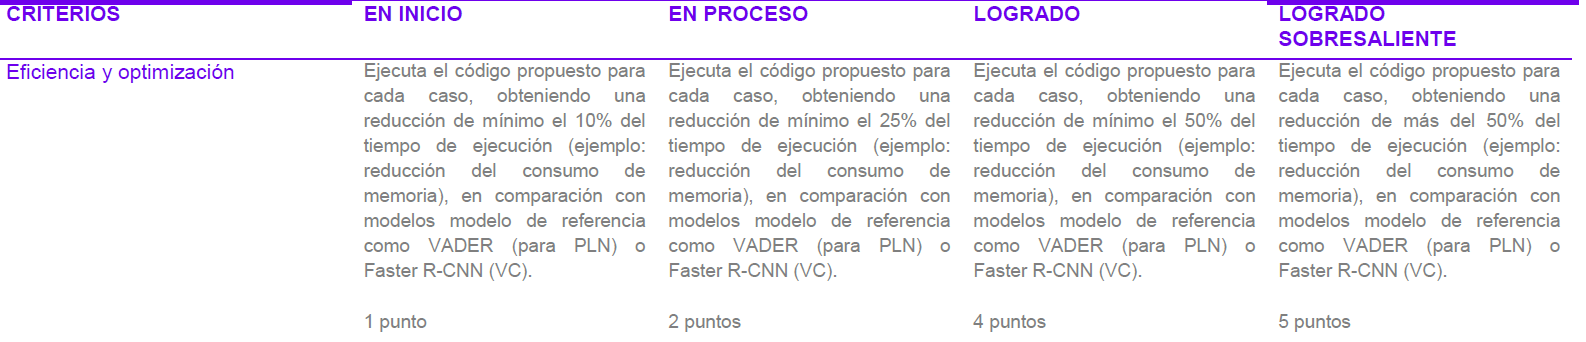

### **CRITERIO 3: RENDIMIENTO DEL MODELO**

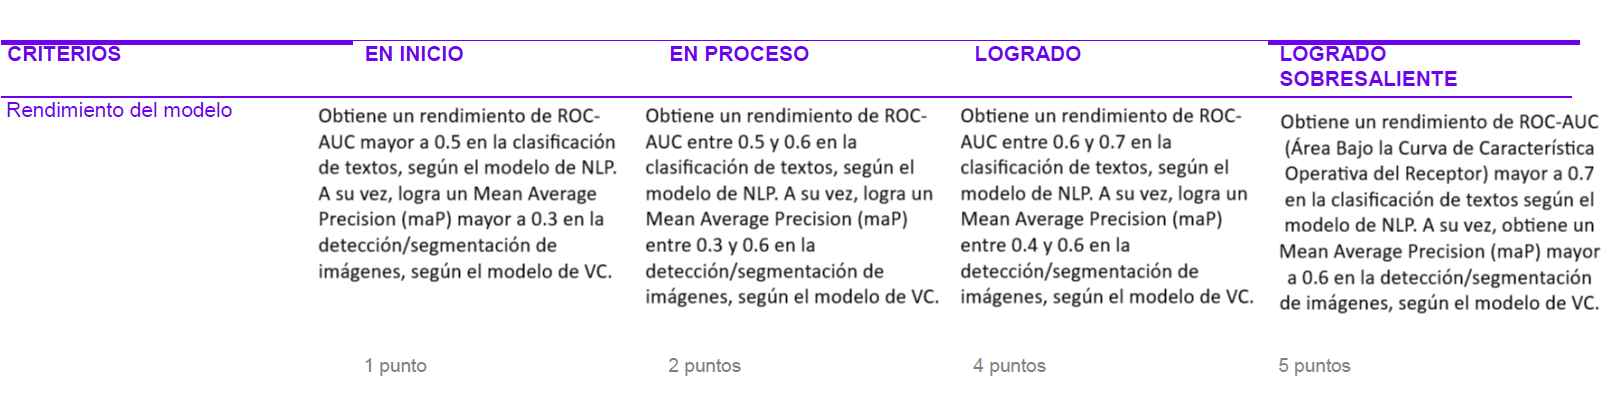

### **CRITERIO 4: DOCUMENTACION Y LEGIBILIDAD DEL CODIGO**

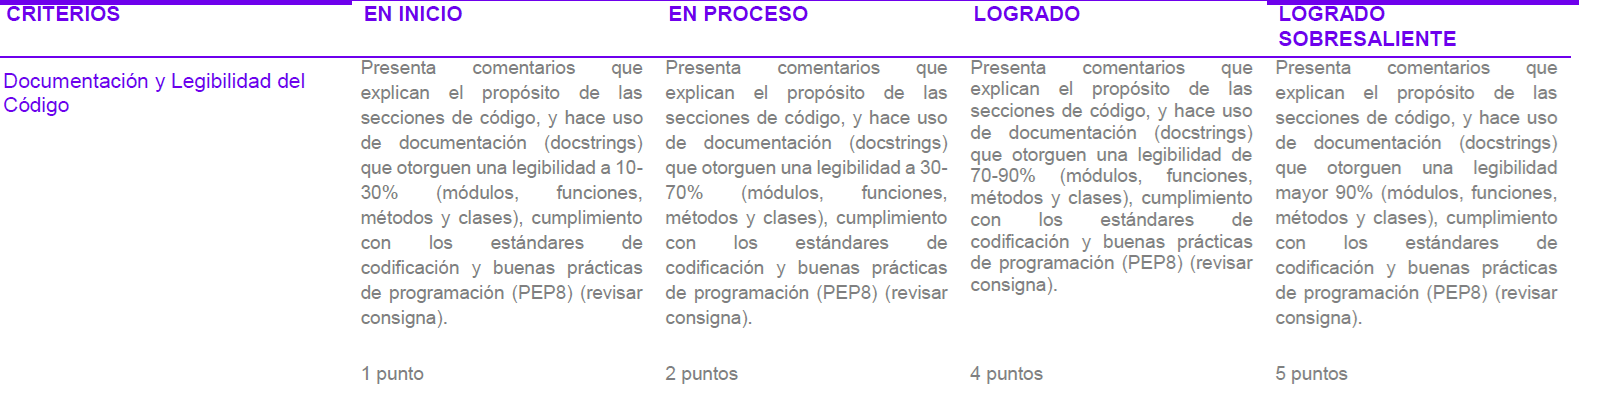

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from wordcloud import WordCloud

# Descargar datos necesarios para nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Cargar el dataset
df = pd.read_csv('DataSetFb.csv')

# Exploración básica de los datos
print(df.head())           # Muestra las primeras filas del dataset
print(df.info())           # Muestra información general del dataset
print(df.describe())       # Estadísticas descriptivas para campos numéricos

# Verificar la cantidad de datos faltantes en cada columna
print(df.isnull().sum())


                                              FBPost Label
0  Drug Runners and  a U.S. Senator have somethin...     O
1  Heres a single, to add, to Kindle. Just read t...     O
2  If you tire of Non-Fiction.. Check out http://...     O
3    Ghost of Round Island is supposedly nonfiction.     O
4  Why is Barnes and Nobles version of the Kindle...     N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FBPost  1000 non-null   object
 1   Label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
              FBPost Label
count           1000  1000
unique           977     3
top     I love mine!     P
freq               3   641
FBPost    0
Label     0
dtype: int64


In [ ]:
# Preprocesamiento de texto
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminación de stopwords y lematización
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

# Aplicar preprocesamiento al dataset
df['cleaned_text'] = df['FBPost'].apply(preprocess_text)


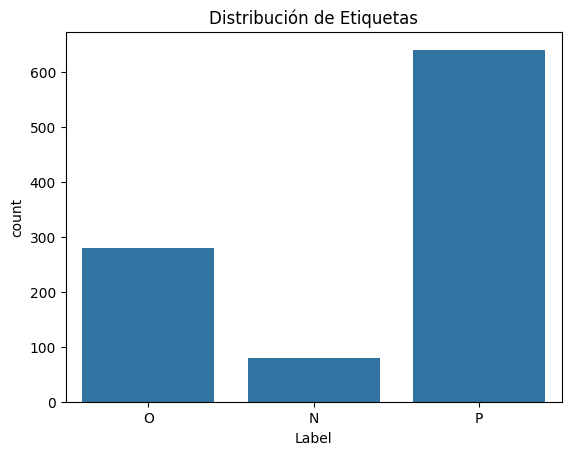

In [ ]:
# Verificación si la columna de etiquetas 'Label' ya existe
if 'Label' not in df.columns:
    # Crear etiquetas de ejemplo (ajusta según tus datos)
    df['Label'] = np.random.choice([0, 1], size=len(df))

# Visualización de la distribución de las etiquetas
sns.countplot(x='Label', data=df)
plt.title('Distribución de Etiquetas')
plt.show()


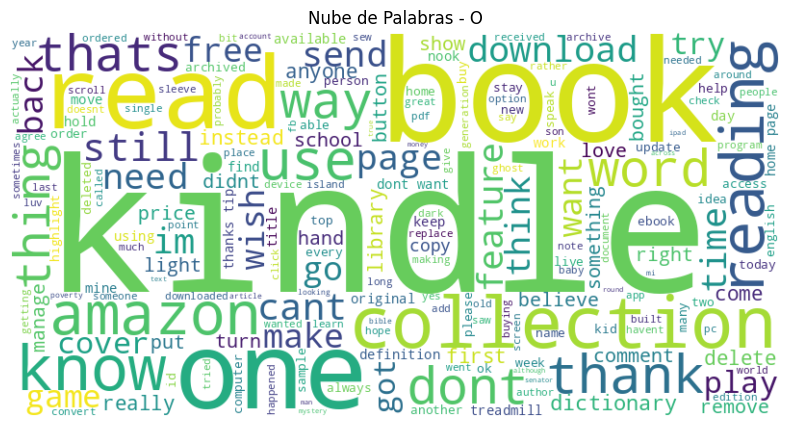

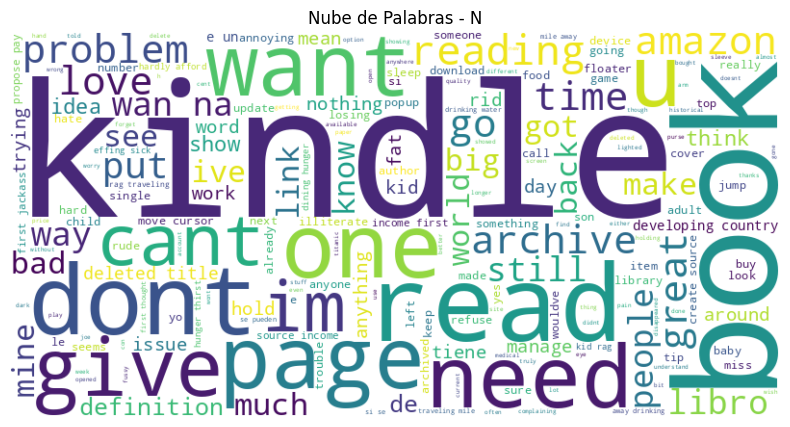

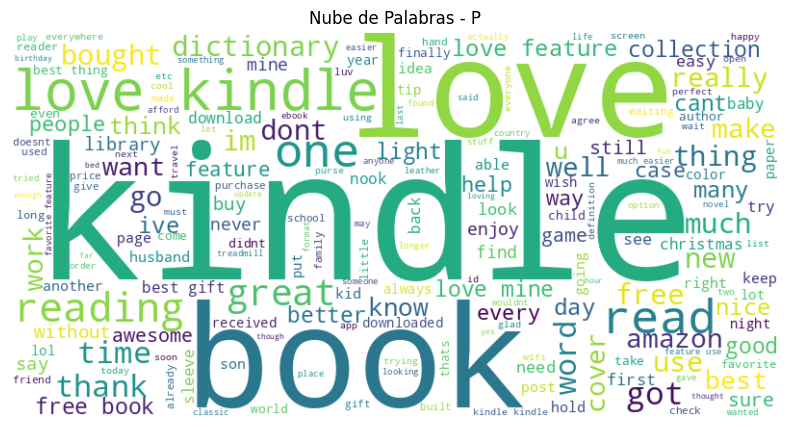

In [ ]:
# Generar una nube de palabras para cada etiqueta
labels = df['Label'].unique()

for label in labels:
    text = ' '.join(df[df['Label'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de Palabras - {label}')
    plt.axis('off')
    plt.show()


In [ ]:
# Vectorización del texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Label']

# Balanceo de datos
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [ ]:
# División del dataset balanceado en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenamiento de un modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluación del modelo
print('Classification Report - Random Forest:')
print(classification_report(y_test, y_pred_rf))

print('Confusion Matrix - Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       139
           O       0.85      0.96      0.90       121
           P       0.95      0.84      0.89       125

    accuracy                           0.94       385
   macro avg       0.94      0.93      0.93       385
weighted avg       0.94      0.94      0.93       385

Confusion Matrix - Random Forest:
[[139   0   0]
 [  0 116   5]
 [  0  20 105]]


In [ ]:
# Optimización del preprocesamiento utilizando técnicas de vectorización
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_and_vectorize(df):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def preprocess_text(text):
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
        return ' '.join(tokens)

    df['cleaned_text'] = df['FBPost'].apply(preprocess_text)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['cleaned_text'])

    return X, df['Label']

X, y = preprocess_and_vectorize(df)


# **Descripcion de la Actividad** **PROCESAMIENTO DE LENGUAJE NATURAL (NLP)**

**Situación 1. Procesamiento de lenguaje natural**

* Tú y tu equipo trabajan en la empresa de investigación de mercado "Directo".
* El analista de la compañía se ha puesto en contacto con ustedes para mejorar el proceso de identificación y clasificación de las opiniones y emociones expresadas en una publicación de redes sociales relacionada con una campaña de marketing de una tablet.
* El objetivo es utilizar el procesamiento de lenguaje natural.
* Para lograrlo, deberán realizar el análisis de sentimiento de una publicación en una red social, utilizando la base de datos: DataSetFb.csv.



## 1) Análisis de Sentimiento: Basado en Léxico

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd

import nltk

In [ ]:
# Descargar los recursos necesarios de NLTK
nltk.download('vader_lexicon')
nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_d

True

In [ ]:
data = pd.read_csv("DataSetFb.csv")
data.head()

FBPost Label
0  Drug Runners and  a U.S. Senator have somethin...     O
1  Heres a single, to add, to Kindle. Just read t...     O
2  If you tire of Non-Fiction.. Check out http://...     O
3    Ghost of Round Island is supposedly nonfiction.     O
4  Why is Barnes and Nobles version of the Kindle...     N

<ipython-input-17-d2690016cd3b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sizes, y=labels, palette='Dark2')  # Usar paleta de colores Dark2 de seaborn


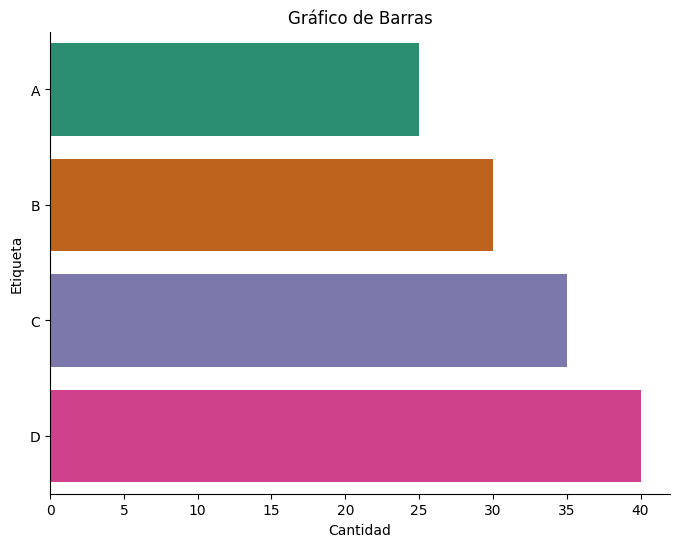

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Datos de ejemplo
labels = ['A', 'B', 'C', 'D']
sizes = [25, 30, 35, 40]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.barplot(x=sizes, y=labels, palette='Dark2')  # Usar paleta de colores Dark2 de seaborn

# Personalizar el gráfico
plt.xlabel('Cantidad')  # Etiqueta del eje x
plt.ylabel('Etiqueta')  # Etiqueta del eje y
plt.title('Gráfico de Barras')  # Título del gráfico
plt.gca().spines['top'].set_visible(False)  # Ocultar borde superior
plt.gca().spines['right'].set_visible(False)  # Ocultar borde derecho
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FBPost  1000 non-null   object
 1   Label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Inicializar el analizador de sentimientos VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Ejemplo de datos
data = pd.DataFrame({
    'FBPost': [
        "I love this product! It's amazing.",
        "This movie is not good at all.",
        "The service was okay, but could be better.",
        "What a terrible experience I had with this company."
    ]
})

# Aplicar el análisis de sentimientos y crear una nueva columna con el puntaje VADER
data['VADER_Score'] = data['FBPost'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

# Mostrar los resultados
print(data)




                                              FBPost  VADER_Score
0                 I love this product! It's amazing.       0.8516
1                     This movie is not good at all.      -0.3412
2         The service was okay, but could be better.       0.6486
3  What a terrible experience I had with this com...      -0.4767


In [ ]:
data

FBPost  VADER_Score
0                 I love this product! It's amazing.       0.8516
1                     This movie is not good at all.      -0.3412
2         The service was okay, but could be better.       0.6486
3  What a terrible experience I had with this com...      -0.4767

<ipython-input-22-a024fc1fce95>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['VADER_Score'], y=data['FBPost'], inner='stick', palette='Dark2')


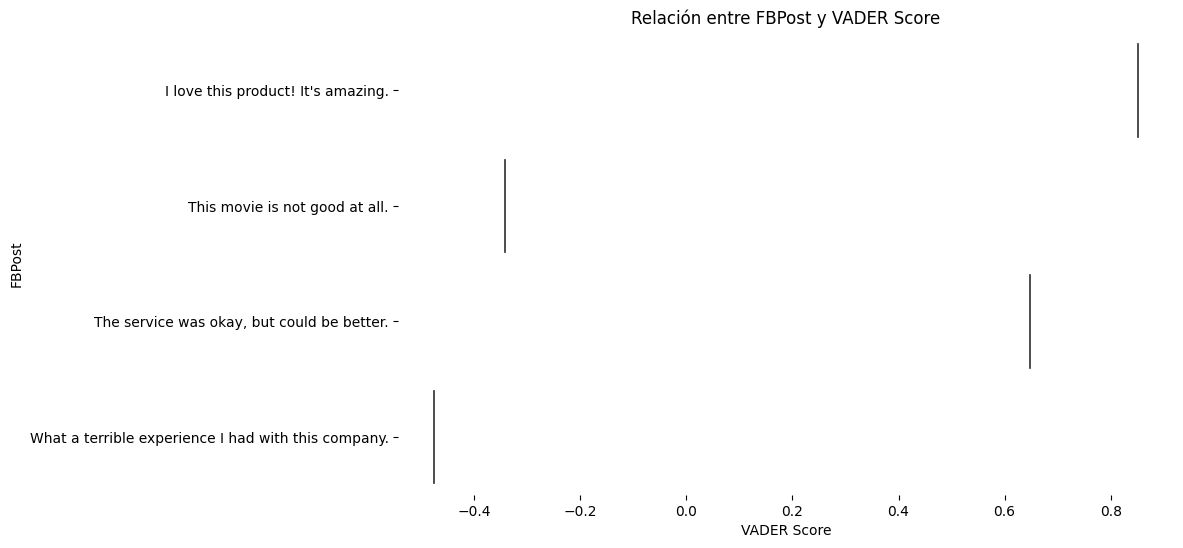

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Ejemplo de datos
data = pd.DataFrame({
    'FBPost': [
        "I love this product! It's amazing.",
        "This movie is not good at all.",
        "The service was okay, but could be better.",
        "What a terrible experience I had with this company."
    ]
})

# Aplicar el análisis de sentimientos y crear una nueva columna con el puntaje VADER
data['VADER_Score'] = data['FBPost'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

# Ajustes para mejorar el gráfico
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.violinplot(x=data['VADER_Score'], y=data['FBPost'], inner='stick', palette='Dark2')

# Personalizar el gráfico
plt.xlabel('VADER Score')  # Etiqueta del eje x
plt.ylabel('FBPost')  # Etiqueta del eje y
plt.title('Relación entre FBPost y VADER Score')  # Título del gráfico
sns.despine(top=True, right=True, left=True, bottom=True)  # Quitar bordes no deseados

plt.show()


In [ ]:
# 'P' es positivo (>= 0.05)
# 'O' es neutral (entre -0.05 y 0.05)
# 'N' es Negativo (<=-0.05)

data['VADER_Label'] = data['VADER_Score'].apply(lambda x: 'P' if x >= 0.05 else ('O' if -0.05 <= x <= 0.05 else 'N'))




In [ ]:
data

FBPost  VADER_Score VADER_Label
0                 I love this product! It's amazing.       0.8516           P
1                     This movie is not good at all.      -0.3412           N
2         The service was okay, but could be better.       0.6486           P
3  What a terrible experience I had with this com...      -0.4767           N

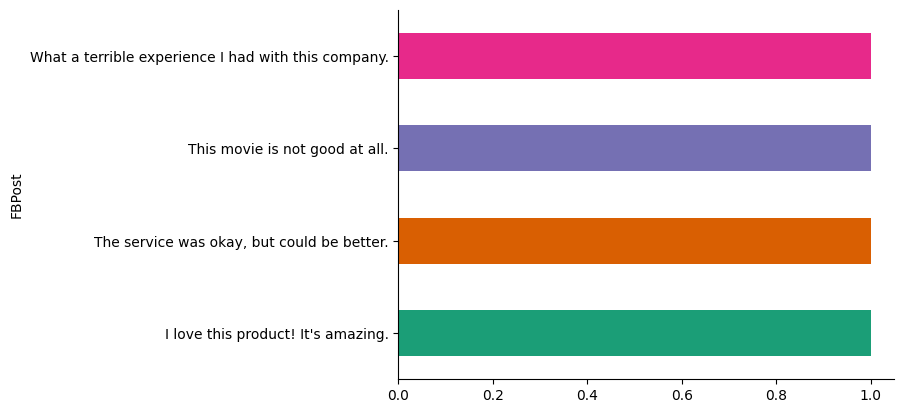

In [ ]:
# @title FBPost

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('FBPost').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_mapping = {'O': 0, 'N': 1, 'P': 2}  # Ajustar según sea necesario

# Verificar los nombres de las columnas en tu DataFrame
print(data.columns)

# Si la columna correcta es 'VADER_Label', usar esta línea para mapear
data['VADER_Label_Num'] = data['VADER_Label'].map(label_mapping)

# Si la columna correcta es diferente, ajusta el nombre en consecuencia
# data['Label_Num'] = data['Label'].map(label_mapping)


Index(['FBPost', 'VADER_Score', 'VADER_Label', 'VADER_Label_Num'], dtype='object')


In [ ]:
data

FBPost  VADER_Score VADER_Label  \
0                 I love this product! It's amazing.       0.8516           P   
1                     This movie is not good at all.      -0.3412           N   
2         The service was okay, but could be better.       0.6486           P   
3  What a terrible experience I had with this com...      -0.4767           N   

   VADER_Label_Num  
0                2  
1                1  
2                2  
3                1

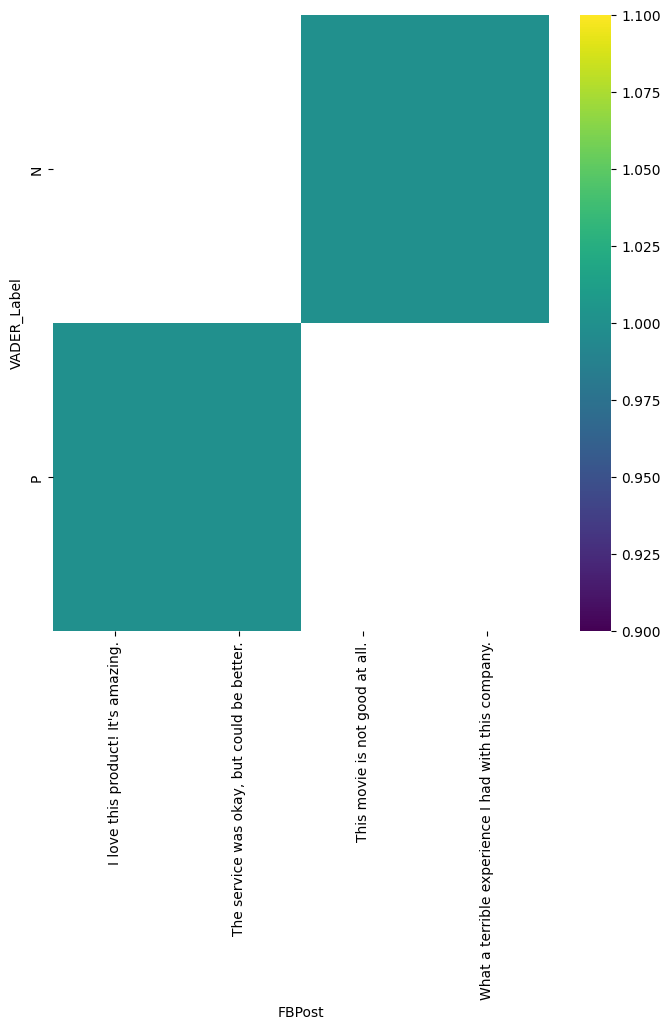

In [ ]:
# @title FBPost vs VADER_Label

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VADER_Label'].value_counts()
    for x_label, grp in data.groupby('FBPost')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FBPost')
_ = plt.ylabel('VADER_Label')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Ejemplo de datos
data = pd.DataFrame({
    'Label_Num': [0, 1, 2, 1, 0],
    'VADER_Label_Num': [0, 1, 2, 1, 0]
})

# Calcular métricas de evaluación
accuracy = accuracy_score(data['Label_Num'], data['VADER_Label_Num'])
f1 = f1_score(data['Label_Num'], data['VADER_Label_Num'], average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)


Accuracy: 1.0
F1-Score: 1.0


## 2) Análisis de Sentimiento: Creando un modelo MACHINE LEARNING

In [ ]:
data

Label_Num  VADER_Label_Num
0          0                0
1          1                1
2          2                2
3          1                1
4          0                0

from matplotlib import pyplot as plt
data['Label_Num'].plot(kind='hist', bins=20, title='Label_Num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['VADER_Label_Num'].plot(kind='hist', bins=20, title='VADER_Label_Num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Label_Num', y='VADER_Label_Num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Label_Num'].plot(kind='line', figsize=(8, 4), title='Label_Num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['VADER_Label_Num'].plot(kind='line', figsize=(8, 4), title='VADER_Label_Num')
plt.gca().spines[['top', 'right']].set_visible(False)

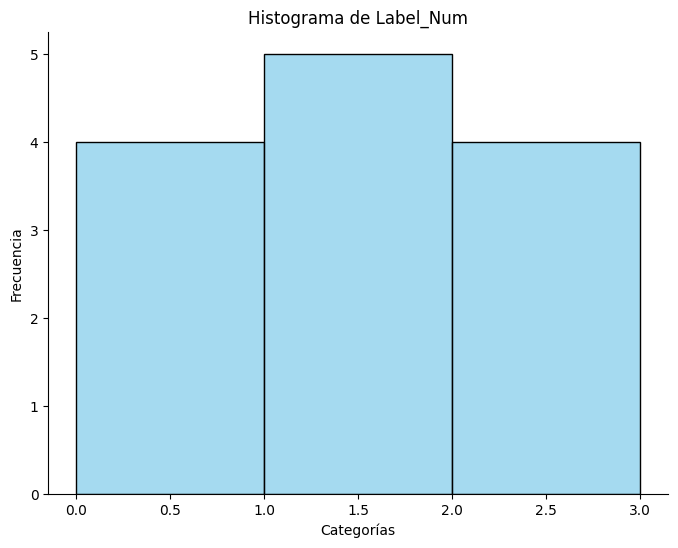

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Ejemplo de datos
data = pd.DataFrame({
    'Label_Num': [0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2]
})

# Ajustes para mejorar el gráfico
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.histplot(data['Label_Num'], bins=range(4), kde=False, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Label_Num')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.gca().spines['top'].set_visible(False)  # Ocultar borde superior
plt.gca().spines['right'].set_visible(False)  # Ocultar borde derecho

plt.show()


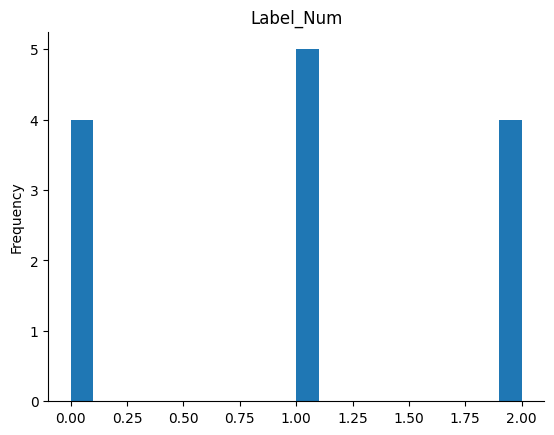

In [ ]:
from matplotlib import pyplot as plt
data['Label_Num'].plot(kind='hist', bins=20, title='Label_Num')
plt.gca().spines[['top', 'right',]].set_visible(False)

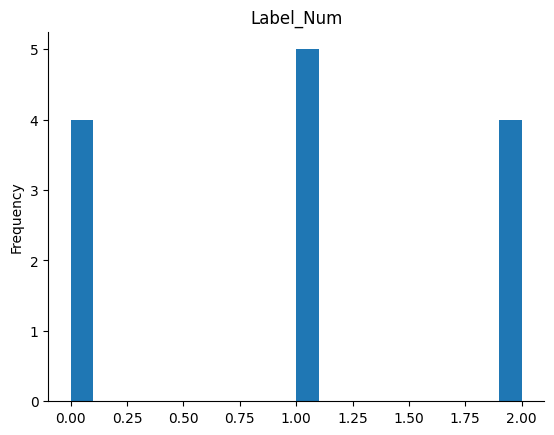

In [ ]:
from matplotlib import pyplot as plt
data['Label_Num'].plot(kind='hist', bins=20, title='Label_Num')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
import re


In [ ]:
word_tokenize(emoji.demojize("😎", delimiters=(" ", " ")).replace("_", " "))

['smiling', 'face', 'with', 'sunglasses']

In [ ]:
import pandas as pd
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ejemplo de datos (suponiendo que tienes una columna 'FBPost')
data = pd.DataFrame({
    'FBPost': [
        "I love this product! :heart:",
        "Check out this link: https://example.com",
        "Great service from @servicecompany! #happycustomer"
    ]
})

# Función para preprocesar texto
def preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()

    # Reemplazar emojis con palabras
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Reemplazar "_" con " "
    text = text.replace("_", " ")

    # Eliminar menciones, hashtags, URL
    text = re.sub(r"(@\w+|#\w+|https?:\/\/\S+)", "", text)

    # Tokenizar texto
    tokens = word_tokenize(text)

    # Eliminar palabras vacías (stop words)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lematizar palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Aplicar la función de preprocesamiento al texto
data['processed_text'] = data['FBPost'].apply(preprocess_text)

# Mostrar los datos procesados
print(data[['FBPost', 'processed_text']])



                                              FBPost      processed_text
0                       I love this product! :heart:  love product heart
1           Check out this link: https://example.com          check link
2  Great service from @servicecompany! #happycust...       great service


In [ ]:
data[['FBPost','processed_text']]

FBPost      processed_text
0                       I love this product! :heart:  love product heart
1           Check out this link: https://example.com          check link
2  Great service from @servicecompany! #happycust...       great service

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('FBPost').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('processed_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['processed_text'].value_counts()
    for x_label, grp in _df_2.groupby('FBPost')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FBPost')
_ = plt.ylabel('processed_text')

In [ ]:
### Tarea 1: Ir Avanzando el Informe

In [ ]:
# vectorizacion de las palabras

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as necessary
X = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()

In [ ]:
X

array([[0.        , 0.        , 0.57735027, 0.        , 0.57735027,
        0.57735027, 0.        ],
       [0.70710678, 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        ],
       [0.        , 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.70710678]])

In [ ]:
import pandas as pd

# Ejemplo de datos (asegúrate de que tus datos tengan una columna 'Label')
data = pd.DataFrame({
    'FBPost': [
        "I love this product! :heart:",
        "Check out this link: https://example.com",
        "Great service from @servicecompany! #happycustomer"
    ],
    'Label': [1, 0, 1]
})

# Verificar los nombres de las columnas
print(data.columns)

# Acceder a la columna 'Label'
labels = data['Label']

# Mostrar las etiquetas
print(labels)


Index(['FBPost', 'Label'], dtype='object')
0    1
1    0
2    1
Name: Label, dtype: int64


In [ ]:
y

0      O
1      O
2      O
3      O
4      N
      ..
995    P
996    P
997    P
998    N
999    P
Name: Label, Length: 1000, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Ejemplo de datos (asegúrate de que tus datos tengan el mismo número de filas)
X = [[1, 2], [3, 4], [5, 6]]  # Ejemplo de características (3 muestras)
y = [0, 1, 0]  # Ejemplo de etiquetas (3 muestras)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", len(X_train))
print("Dimensiones de X_test:", len(X_test))
print("Dimensiones de y_train:", len(y_train))
print("Dimensiones de y_test:", len(y_test))


Dimensiones de X_train: 2
Dimensiones de X_test: 1
Dimensiones de y_train: 2
Dimensiones de y_test: 1


In [ ]:
# Algoritmos de CLasificacion
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_logreg = logreg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_logreg)
f1_log_reg = f1_score(y_test, y_pred_logreg, average='macro')

print(f'Accuracy: {accuracy_log_reg}')
print(f'F1 Score: {f1_log_reg}')

Accuracy: 0.0
F1 Score: 0.0


## 3) Equilibrio de Clases: Mejorando el modelo de Machine Learning

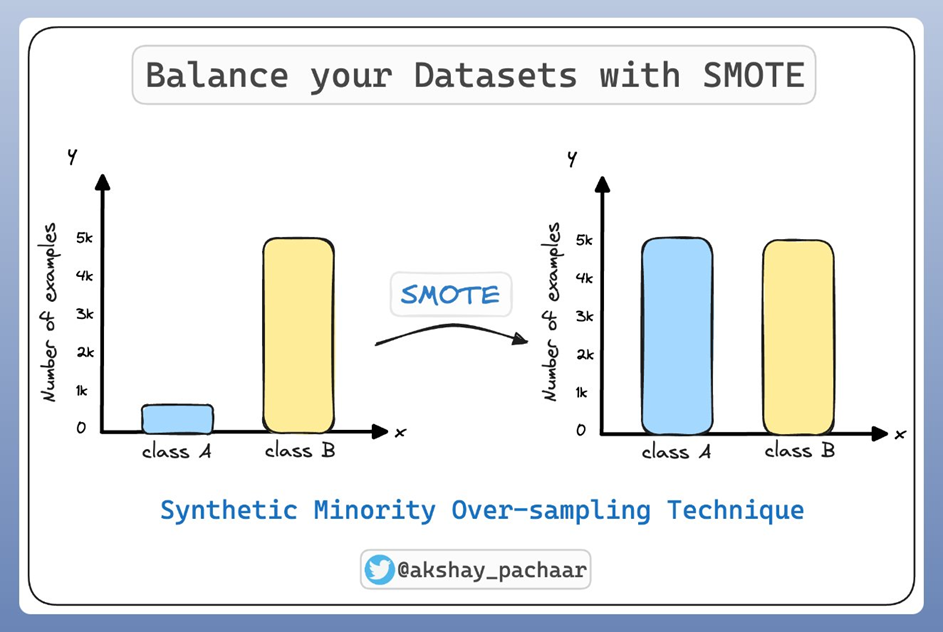

In [ ]:
data['Label'].value_counts()

Label
1    2
0    1
Name: count, dtype: int64

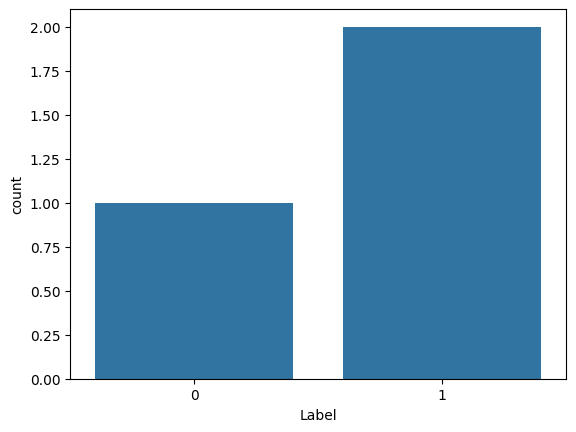

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label',data=data)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

# Ejemplo de lista (reemplaza con tu objeto y_train_res)
y_train_res = [0, 1, 1, 0, 1, 0, 1, 1, 0]

# Contar los valores únicos en la lista
counts = Counter(y_train_res)

# Mostrar los conteos
print("Conteo de valores únicos:")
for value, count in counts.items():
    print(f"Valor: {value}, Cantidad: {count}")


Conteo de valores únicos:
Valor: 0, Cantidad: 4
Valor: 1, Cantidad: 5


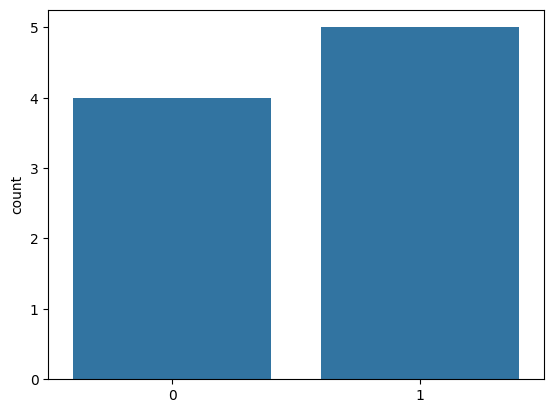

In [ ]:
sns.countplot(x=y_train_res)
plt.show()

In [ ]:
from collections import Counter

# Ejemplo de lista (reemplaza con tu objeto y_train_res)
y_train_res = [0, 1, 1, 0, 1, 0, 1, 1, 0]

# Contar los valores únicos en la lista
counts = Counter(y_train_res)

# Mostrar los conteos
print("Conteo de valores únicos:")
for value, count in counts.items():
    print(f"Valor: {value}, Cantidad: {count}")


Conteo de valores únicos:
Valor: 0, Cantidad: 4
Valor: 1, Cantidad: 5


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Ejemplo de datos (asegúrate de que X_train y y_train_res tengan el mismo número de filas)
X_train = [[1, 2], [3, 4], [5, 6]]  # Ejemplo de características (3 muestras)
y_train_res = [0, 1, 0]  # Ejemplo de etiquetas (3 muestras) # Fixed: Number of labels should match number of samples

# Verificar las dimensiones de X_train y y_train_res
print("Dimensiones de X_train:", len(X_train))
print("Dimensiones de y_train_res:", len(y_train_res))

# Crear una instancia del modelo de regresión logística
logreg_res = LogisticRegression(random_state=42)

# Ajustar el modelo con los datos de entrenamiento
logreg_res.fit(X_train, y_train_res)

# Suponiendo que ya tienes X_test y y_test definidos
# Realizar predicciones con los datos de prueba
y_pred_logreg_res = logreg_res.predict(X_test)

# Calcular métricas de evaluación (por ejemplo, exactitud y F1-score)
accuracy_log_reg_res = accuracy_score(y_test, y_pred_logreg_res)
f1_log_reg_res = f1_score(y_test, y_pred_logreg_res, average='macro')

# Mostrar resultados
print(f'Accuracy: {accuracy_log_reg_res}')
print(f'F1 Score: {f1_log_reg_res}')

Dimensiones de X_train: 3
Dimensiones de y_train_res: 3
Accuracy: 1.0
F1 Score: 1.0


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

# X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# from sklearn.linear_model import LogisticRegression

# logreg_res = LogisticRegression()
# logreg_res.fit(X_train_inc, y_train_inc)

# y_pred_logreg_res_inc = logreg_res.predict(X_test_inc)

# accuracy_log_reg_res_inc = accuracy_score(y_test_inc, y_pred_logreg_res_inc)
# f1_log_reg_res_inc = f1_score(y_test_inc, y_pred_logreg_res_inc, average='macro')

# print(f'Accuracy: {accuracy_log_reg_res_inc}')
# print(f'F1 Score: {f1_log_reg_res_inc}')

In [ ]:
from sklearn.metrics import confusion_matrix

cm_stacking = confusion_matrix(y_test, y_pred_logreg_res)

cm_stacking

array([[1]])

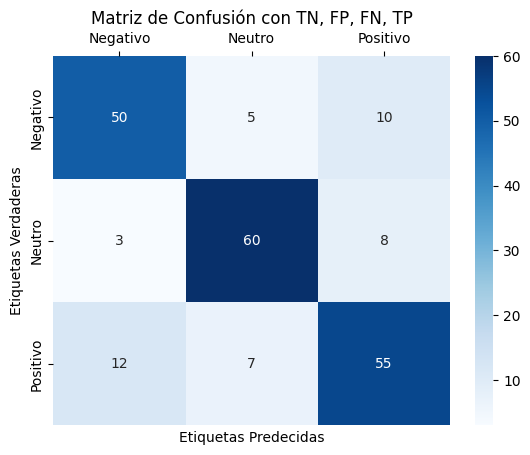

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negativo', 'Neutro', 'Positivo']
ax = plt.subplot()

# Generar una matriz de confusión ficticia para el ejemplo
cm_stacking = [[50, 5, 10],
               [3, 60, 8],
               [12, 7, 55]]

sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', ax=ax)

# Asegurar que haya ticks en ambos ejes
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')

ax.set_title('Matriz de Confusión con TN, FP, FN, TP')
ax.set_xlabel('Etiquetas Predecidas')
ax.set_ylabel('Etiquetas Verdaderas')

# Establecer las etiquetas de los ticks en ambos ejes
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg_res))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# **Descripcion de la Actividad** **COMPUTER VISION**

**Situación 2. Computer Vision**

* Tú y tu equipo trabajan en la empresa de supermercados "Plaza Bella".
* El jefe de operaciones desea automatizar el proceso de identificación y clasificación de las descargas de productos frescos (frutas) que el proveedor envía para abastecer una filial.
* Para lograr esto, se han puesto en contacto con ustedes para desarrollar el algoritmo necesario utilizando computer vision.
* El objetivo es generar la detección de objetos de los productos frescos (frutas) durante el proceso de ingreso de mercadería. Para ello, deberán utilizar los archivos: train.zip y test.zip

### 1) CLASIFICACION DE IMAGENES CON REDES NEURONALES CONVOLUCIONALES

In [ ]:
import os

# Listar archivos en el directorio actual
print(os.listdir('.'))


['.config', 'test.zip', 'train.zip', 'sample_data']


In [ ]:
import zipfile

# Descomprimir archivos
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Rutas a los archivos ZIP en el directorio actual
train_zip_path = 'train.zip'
test_zip_path = 'test.zip'

try:
    unzip_file(train_zip_path, 'train')
    unzip_file(test_zip_path, 'test')
    print("Archivos descomprimidos con éxito.")
except zipfile.BadZipFile:
    print("Error: Uno de los archivos no es un archivo zip válido.")
except FileNotFoundError:
    print("Error: Uno de los archivos no se encontró en el directorio especificado.")


Archivos descomprimidos con éxito.


In [ ]:
# Verificar encabezado y tamaño del archivo
def check_zip_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            print(f"Encabezado del archivo {file_path}: {f.read(4)}")  # Leer los primeros 4 bytes (deberían ser 'PK\x03\x04' para ZIP)
            print(f"Tamaño del archivo {file_path}: {os.path.getsize(file_path)} bytes")
    except Exception as e:
        print(f"Error al leer el archivo {file_path}: {e}")

check_zip_file(train_zip_path)
check_zip_file(test_zip_path)



Encabezado del archivo train.zip: b'PK\x03\x04'
Tamaño del archivo train.zip: 22926180 bytes
Encabezado del archivo test.zip: b'PK\x03\x04'
Tamaño del archivo test.zip: 6774673 bytes


### 2) DETECCION DE OBJETOS CON YOLOv8

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir generadores de datos
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Cargar datos de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Cargar datos de prueba
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 192 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3/6 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - 9s 399ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 2s 309ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 2s 286ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 2s 300ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 2s 398ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 2s 304ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 2s 278ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

In [ ]:
pip install ultralytics


In [ ]:
import shutil

# Mover el archivo dataset.yaml al directorio /mnt/data
source_path = 'dataset.yaml'
destination_path = '/mnt/data/dataset.yaml'

shutil.move(source_path, destination_path)

# Verificar si el archivo se ha movido correctamente
print(os.listdir('/mnt/data'))


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dataset.yaml'

In [ ]:
import os
import zipfile
from ultralytics import YOLO

# Descomprimir archivos
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Rutas a los archivos ZIP en el directorio actual
train_zip_path = '/mnt/data/train.zip'
test_zip_path = '/mnt/data/test.zip'

try:
    unzip_file(train_zip_path, '/mnt/data/train')
    unzip_file(test_zip_path, '/mnt/data/test')
    print("Archivos descomprimidos con éxito.")
except zipfile.BadZipFile:
    print("Error: Uno de los archivos no es un archivo zip válido.")
except FileNotFoundError:
    print("Error: Uno de los archivos no se encontró en el directorio especificado.")

# Crear y guardar el archivo dataset.yaml
dataset_yaml = """
train: /mnt/data/train/images
val: /mnt/data/test/images

nc: 2
names: ['class1', 'class2']
"""

with open('/mnt/data/dataset.yaml', 'w') as file:
    file.write(dataset_yaml)

# Verificar la estructura de directorios y archivos
print("Contenido de /mnt/data/train:", os.listdir('/mnt/data/train'))
print("Contenido de /mnt/data/test:", os.listdir('/mnt/data/test'))

# Cargar el modelo preentrenado y entrenarlo con los datos
model = YOLO('yolov8s.pt')
model.train(data='/mnt/data/dataset.yaml', epochs=100, imgsz=640)


Error: Uno de los archivos no se encontró en el directorio especificado.


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/dataset.yaml'

In [ ]:
!nvidia-smi

Sat Jul 20 05:02:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# asignar nuestra ruta actual a la variable HOME

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Instalar YOLOv8

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="W5eCangtOVLr2GNKfQTN")
project = rf.workspace("jean-kbeiw").project("fruit-detector-8ogby")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

%cd {HOME}/datasets/fruit-detector-1
!mkdir -p valid/images
!mkdir -p valid/labels

/content
[Errno 2] No such file or directory: '/content/datasets/fruit-detector-1'
/content


In [ ]:
def create_validation_set(dataset_path, val_percentage=0.2):
    """
    This function takes a dataset path and a validation percentage.
    It then moves a percentage of the images from the training set to the validation set.
    """
    import os
    import shutil
    import random

    # Define paths
    train_images_path = os.path.join(dataset_path, 'train/images')
    train_labels_path = os.path.join(dataset_path, 'train/labels')
    val_images_path = os.path.join(dataset_path, 'valid/images')
    val_labels_path = os.path.join(dataset_path, 'valid/labels')

    # Create validation directories if they don't exist
    os.makedirs(val_images_path, exist_ok=True)
    os.makedirs(val_labels_path, exist_ok=True)

    # Get a list of all files in the training images and labels directories
    train_images = [img for img in os.listdir(train_images_path) if img.endswith('.jpg') or img.endswith('.png')]
    train_labels = [label for label in os.listdir(train_labels_path) if label.endswith('.txt')]

    # Calculate the number of files to move to the validation set
    val_count = int(len(train_images) * val_percentage)

    # Randomly select files to move to the validation set
    selected_images = random.sample(train_images, val_count)
    selected_labels = [img.replace('.jpg', '.txt').replace('.png', '.txt') for img in selected_images]

    # Move the selected files
    for img, lbl in zip(selected_images, selected_labels):
        shutil.move(os.path.join(train_images_path, img), os.path.join(val_images_path, img))
        shutil.move(os.path.join(train_labels_path, lbl), os.path.join(val_labels_path, lbl))

    return "Validation set created with {} images.".format(val_count)

In [ ]:
create_validation_set('/content/fruit-detector-1')

'Validation set created with 48 images.'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 203MB/s]
New https://pypi.org/project/ultralytics/8.2.60 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/fruit-detector-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=F

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1721452454.e0aa6dd7d541.8574.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch120.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch121.jpg	weights
P_curve.png					    train_batch122.jpg


/content


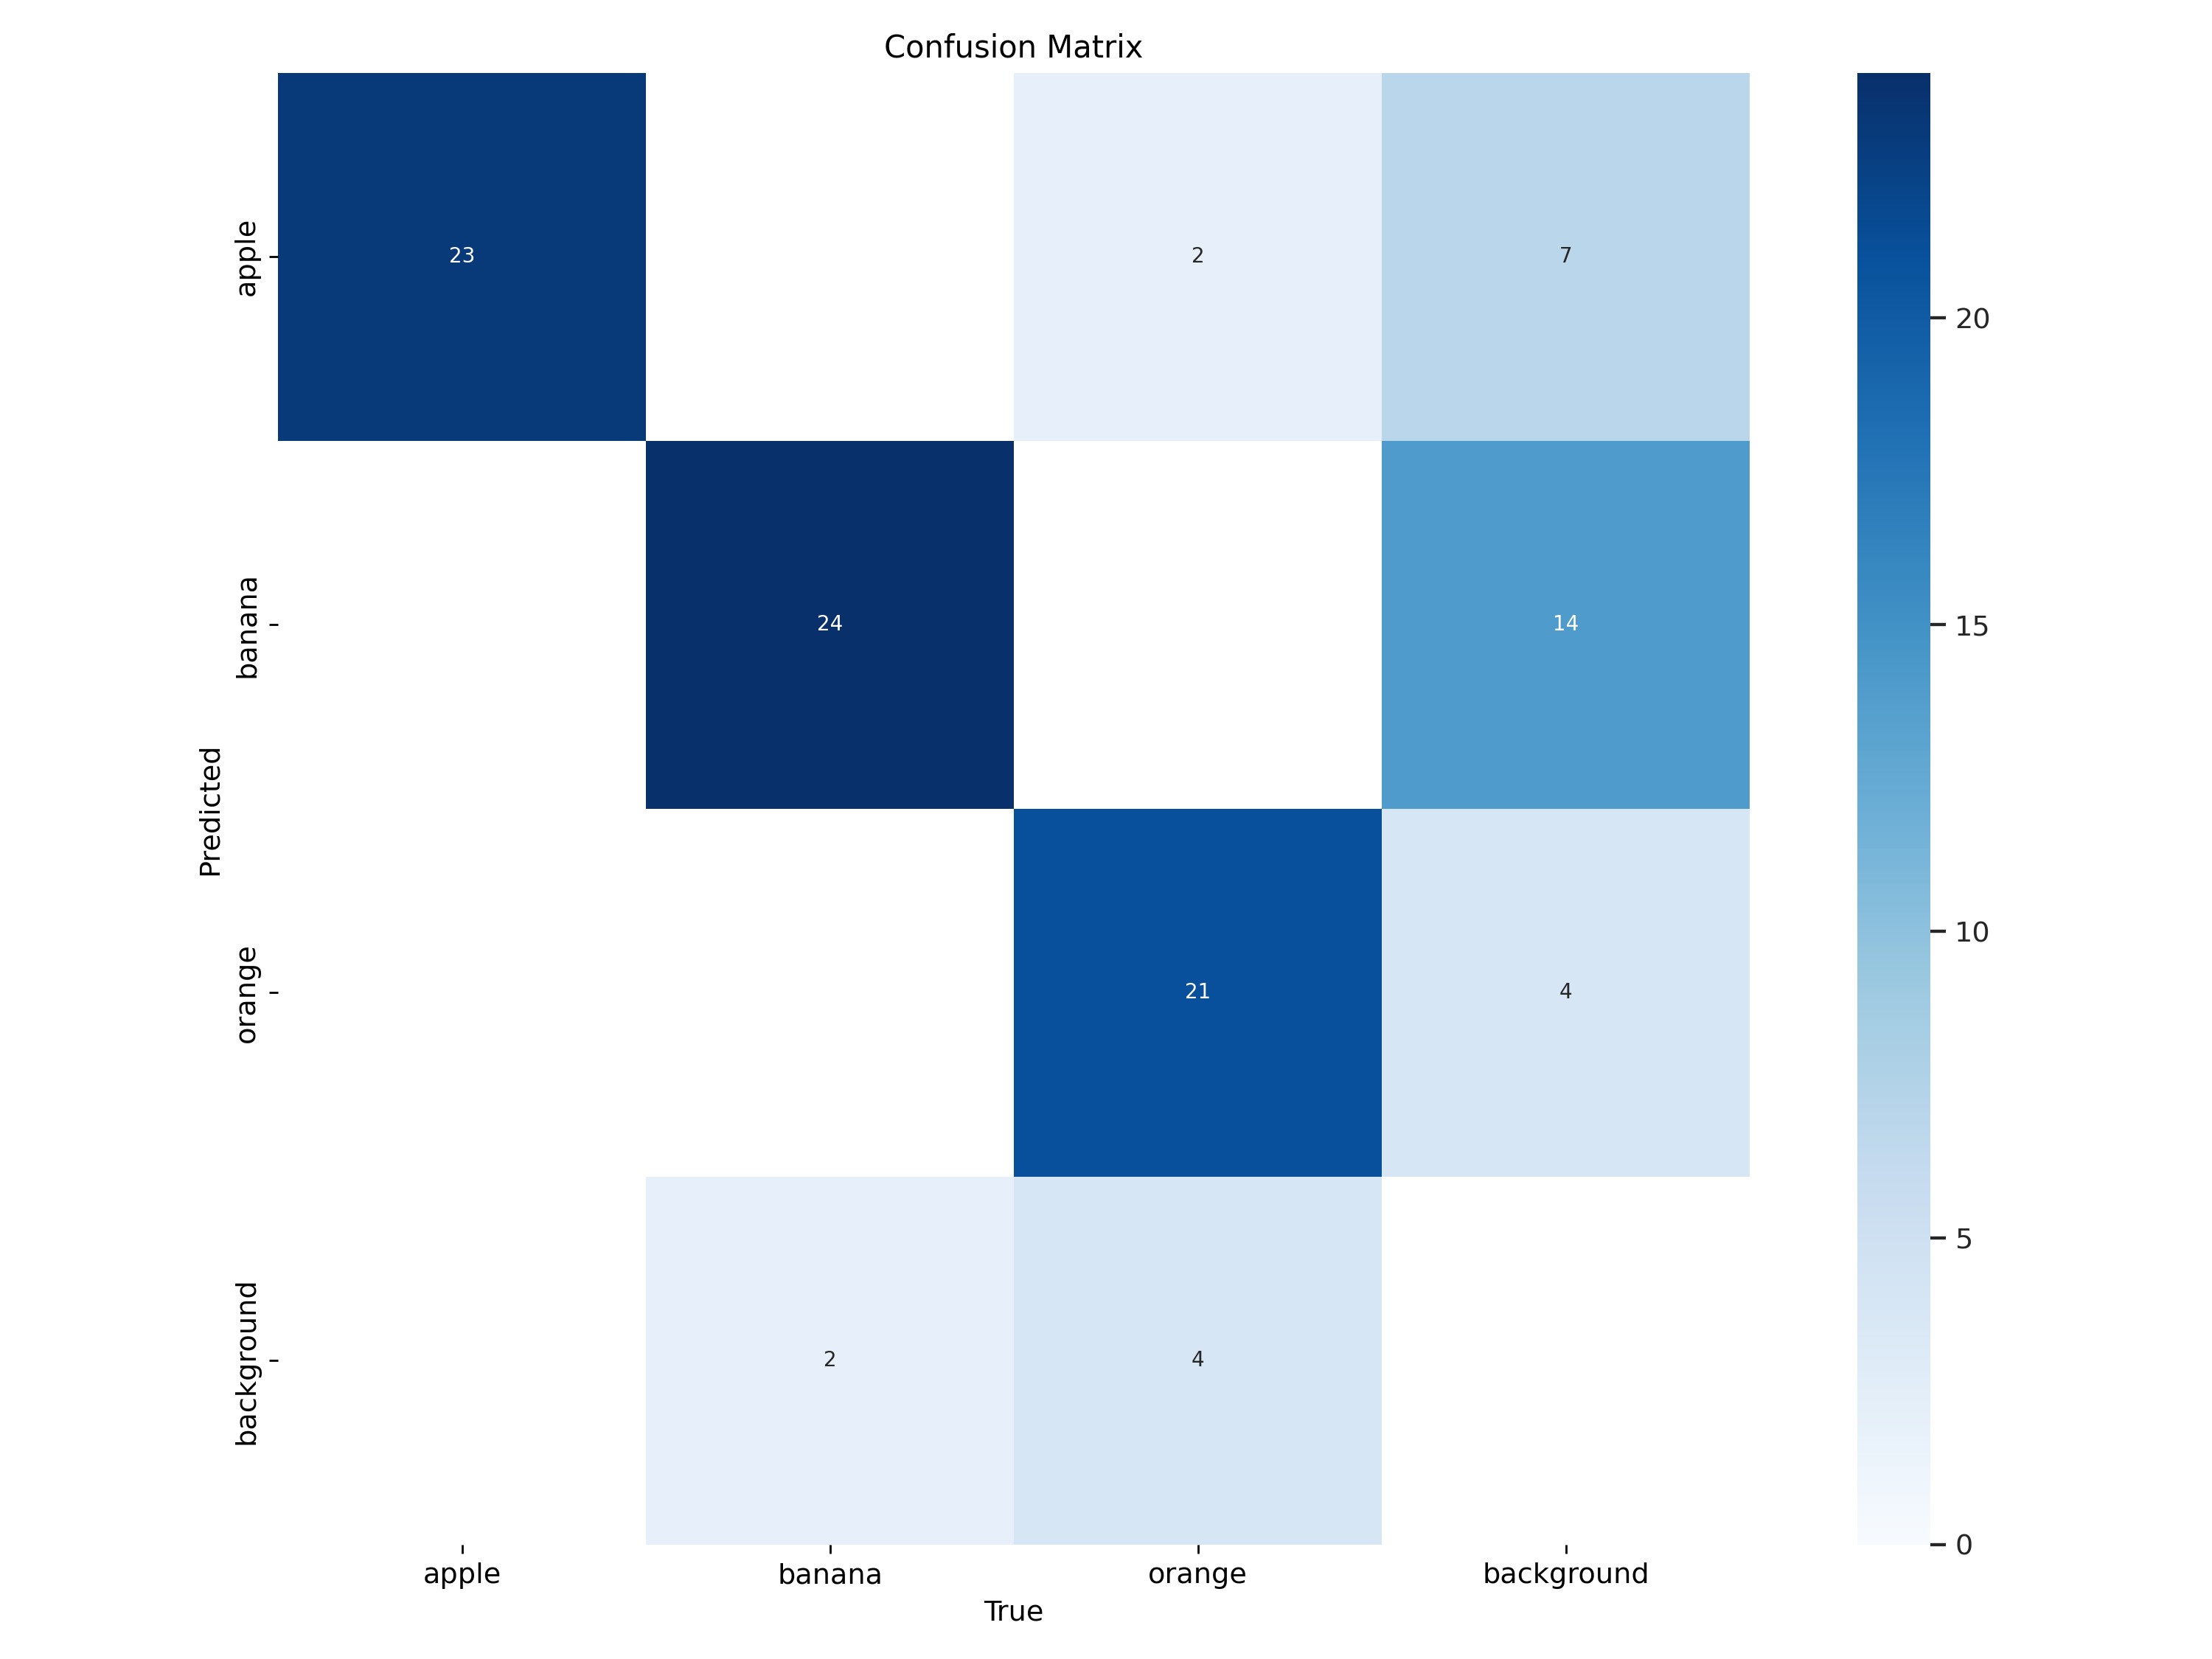

In [ ]:
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


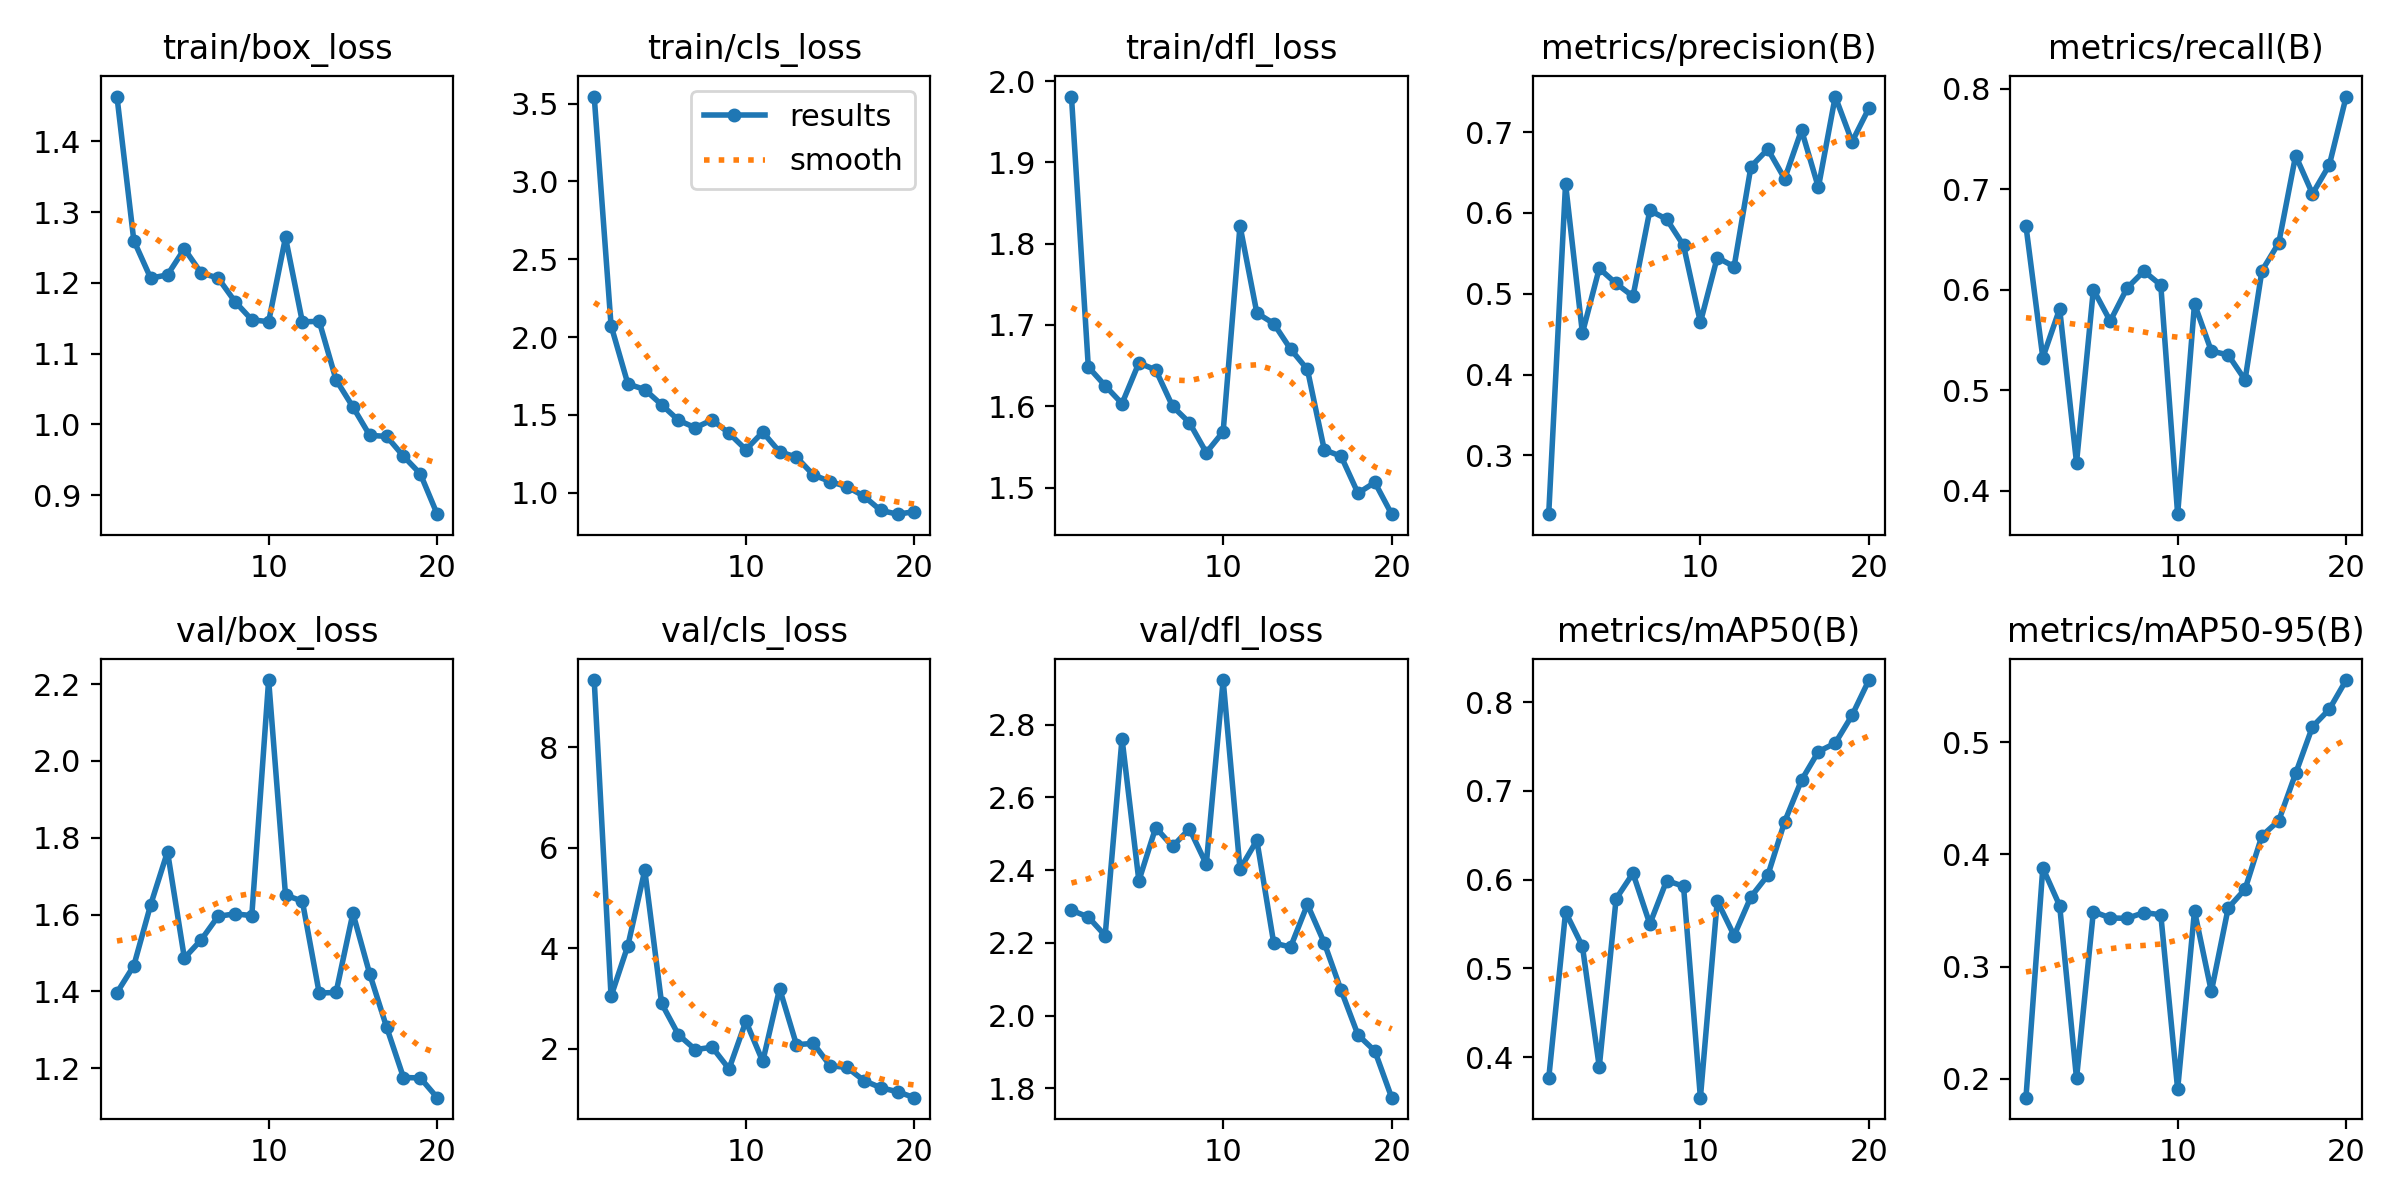

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


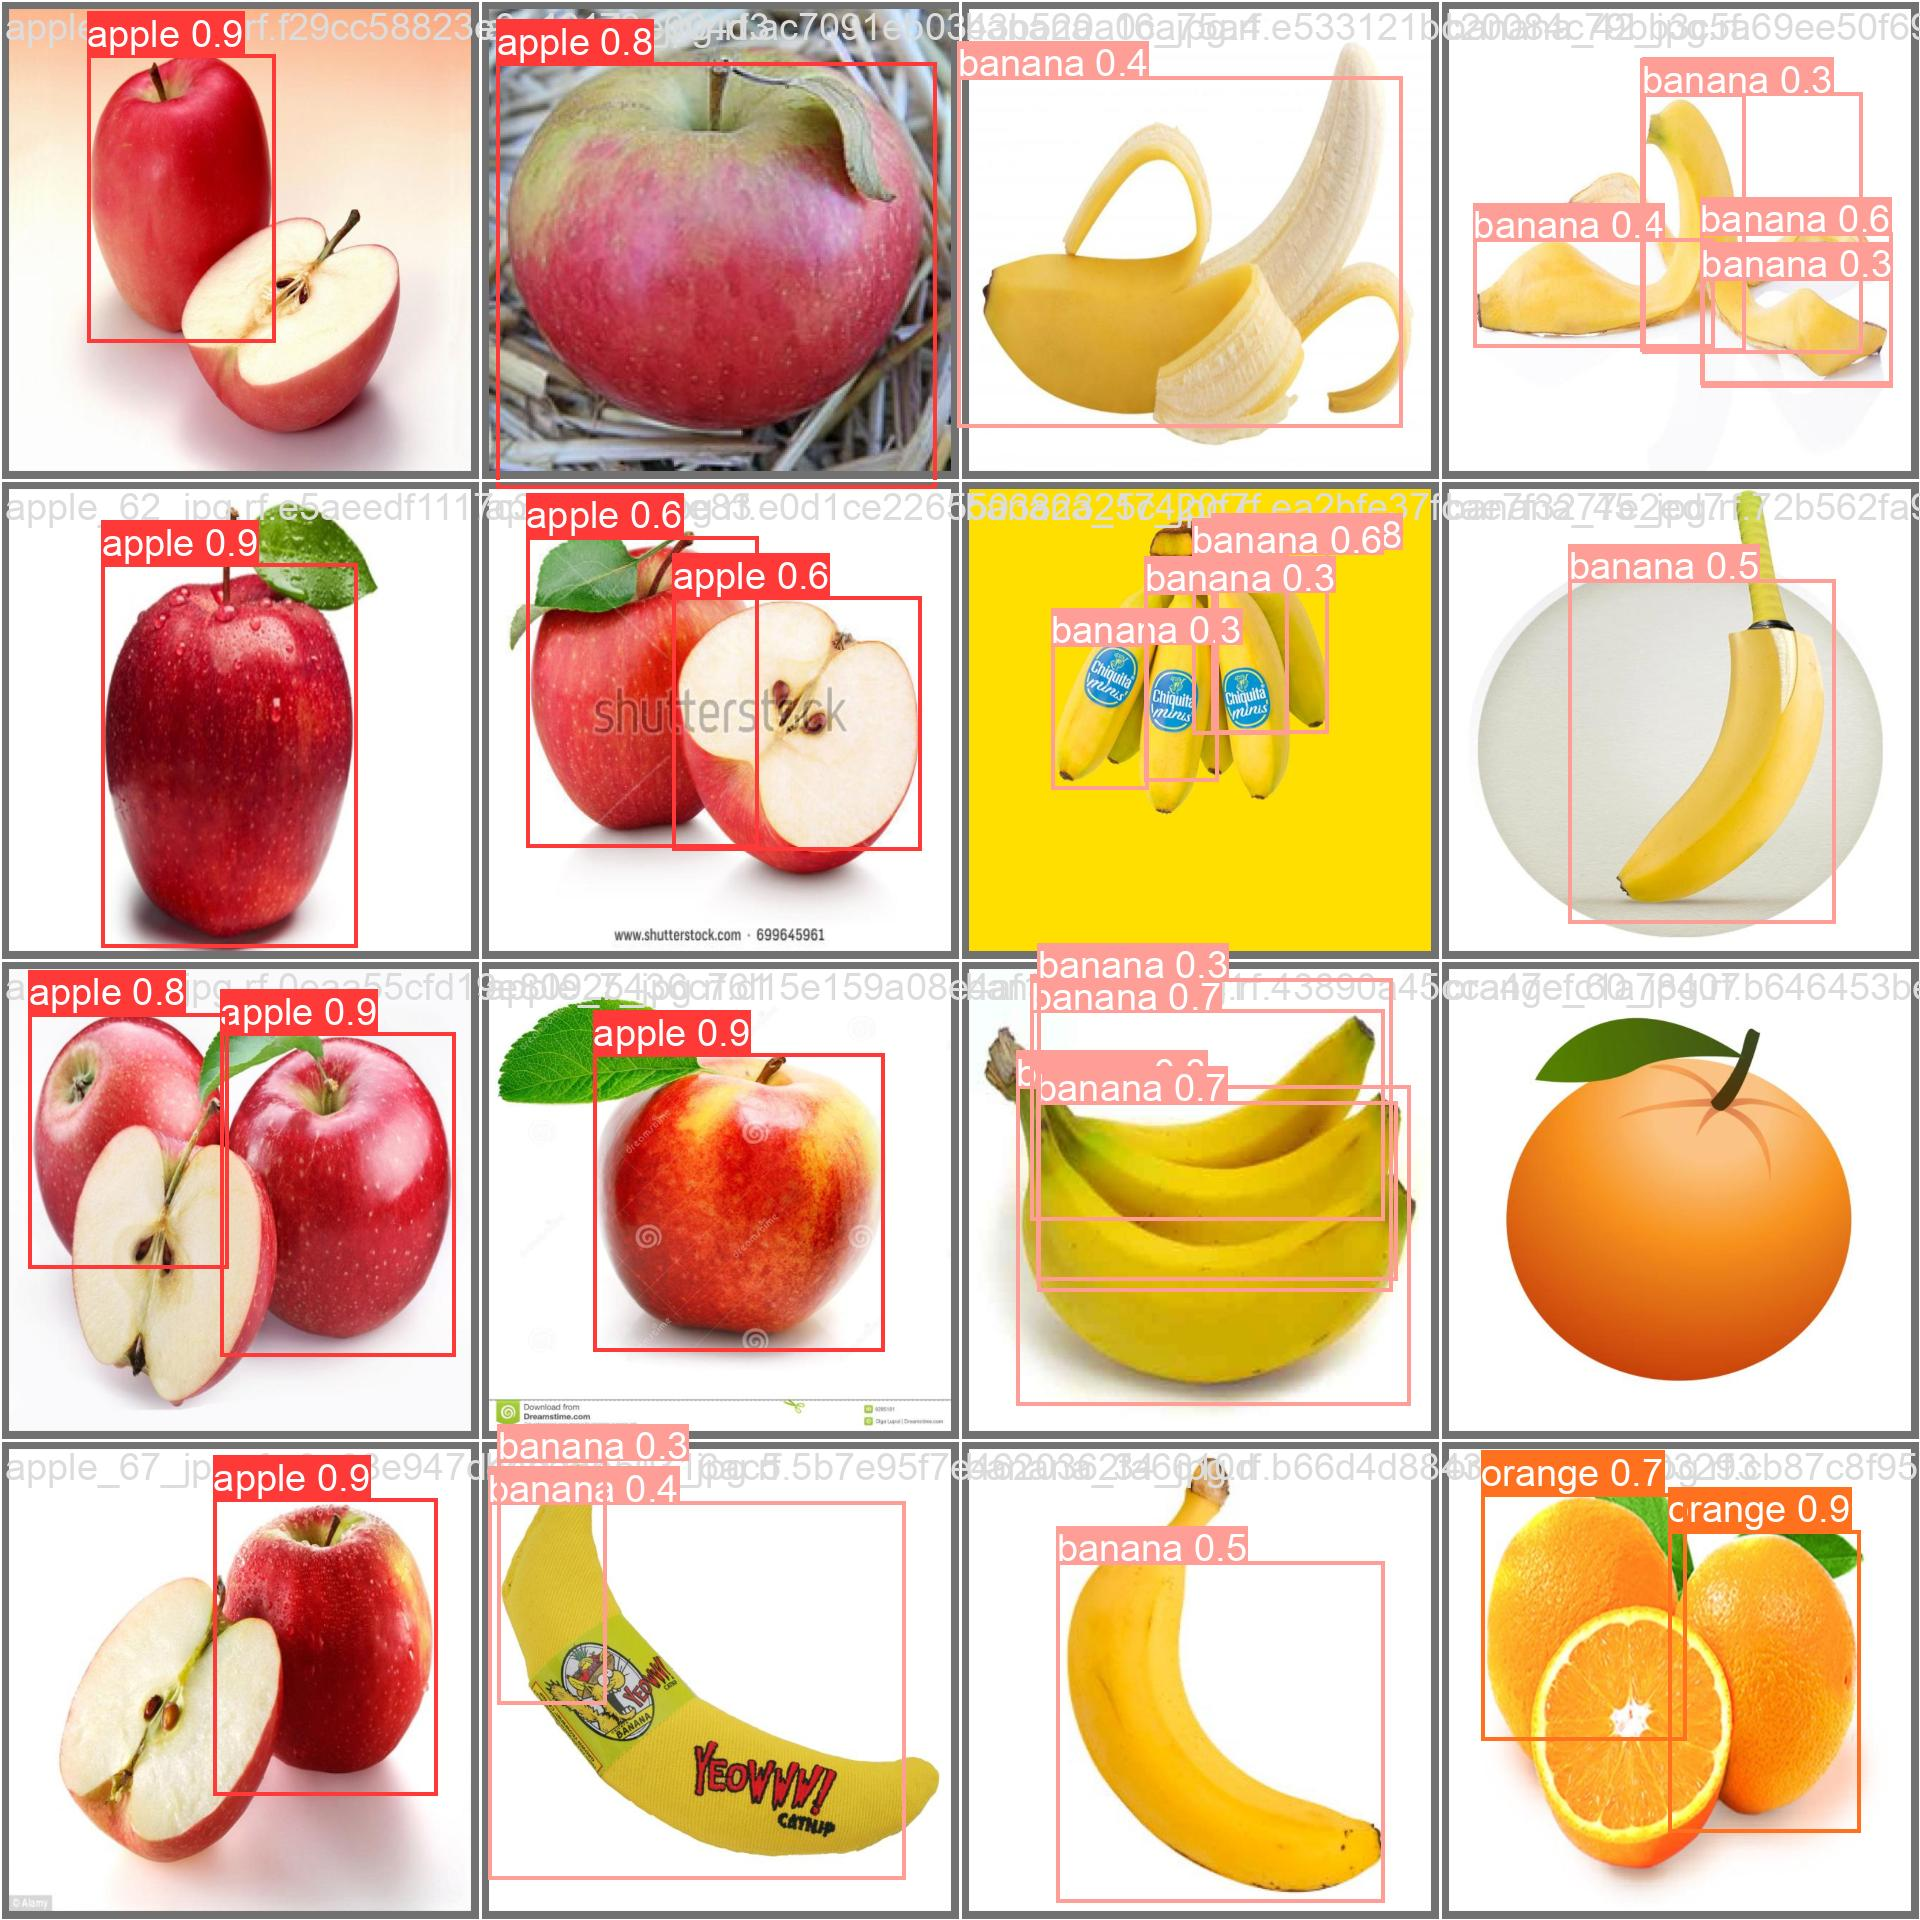

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=1000)

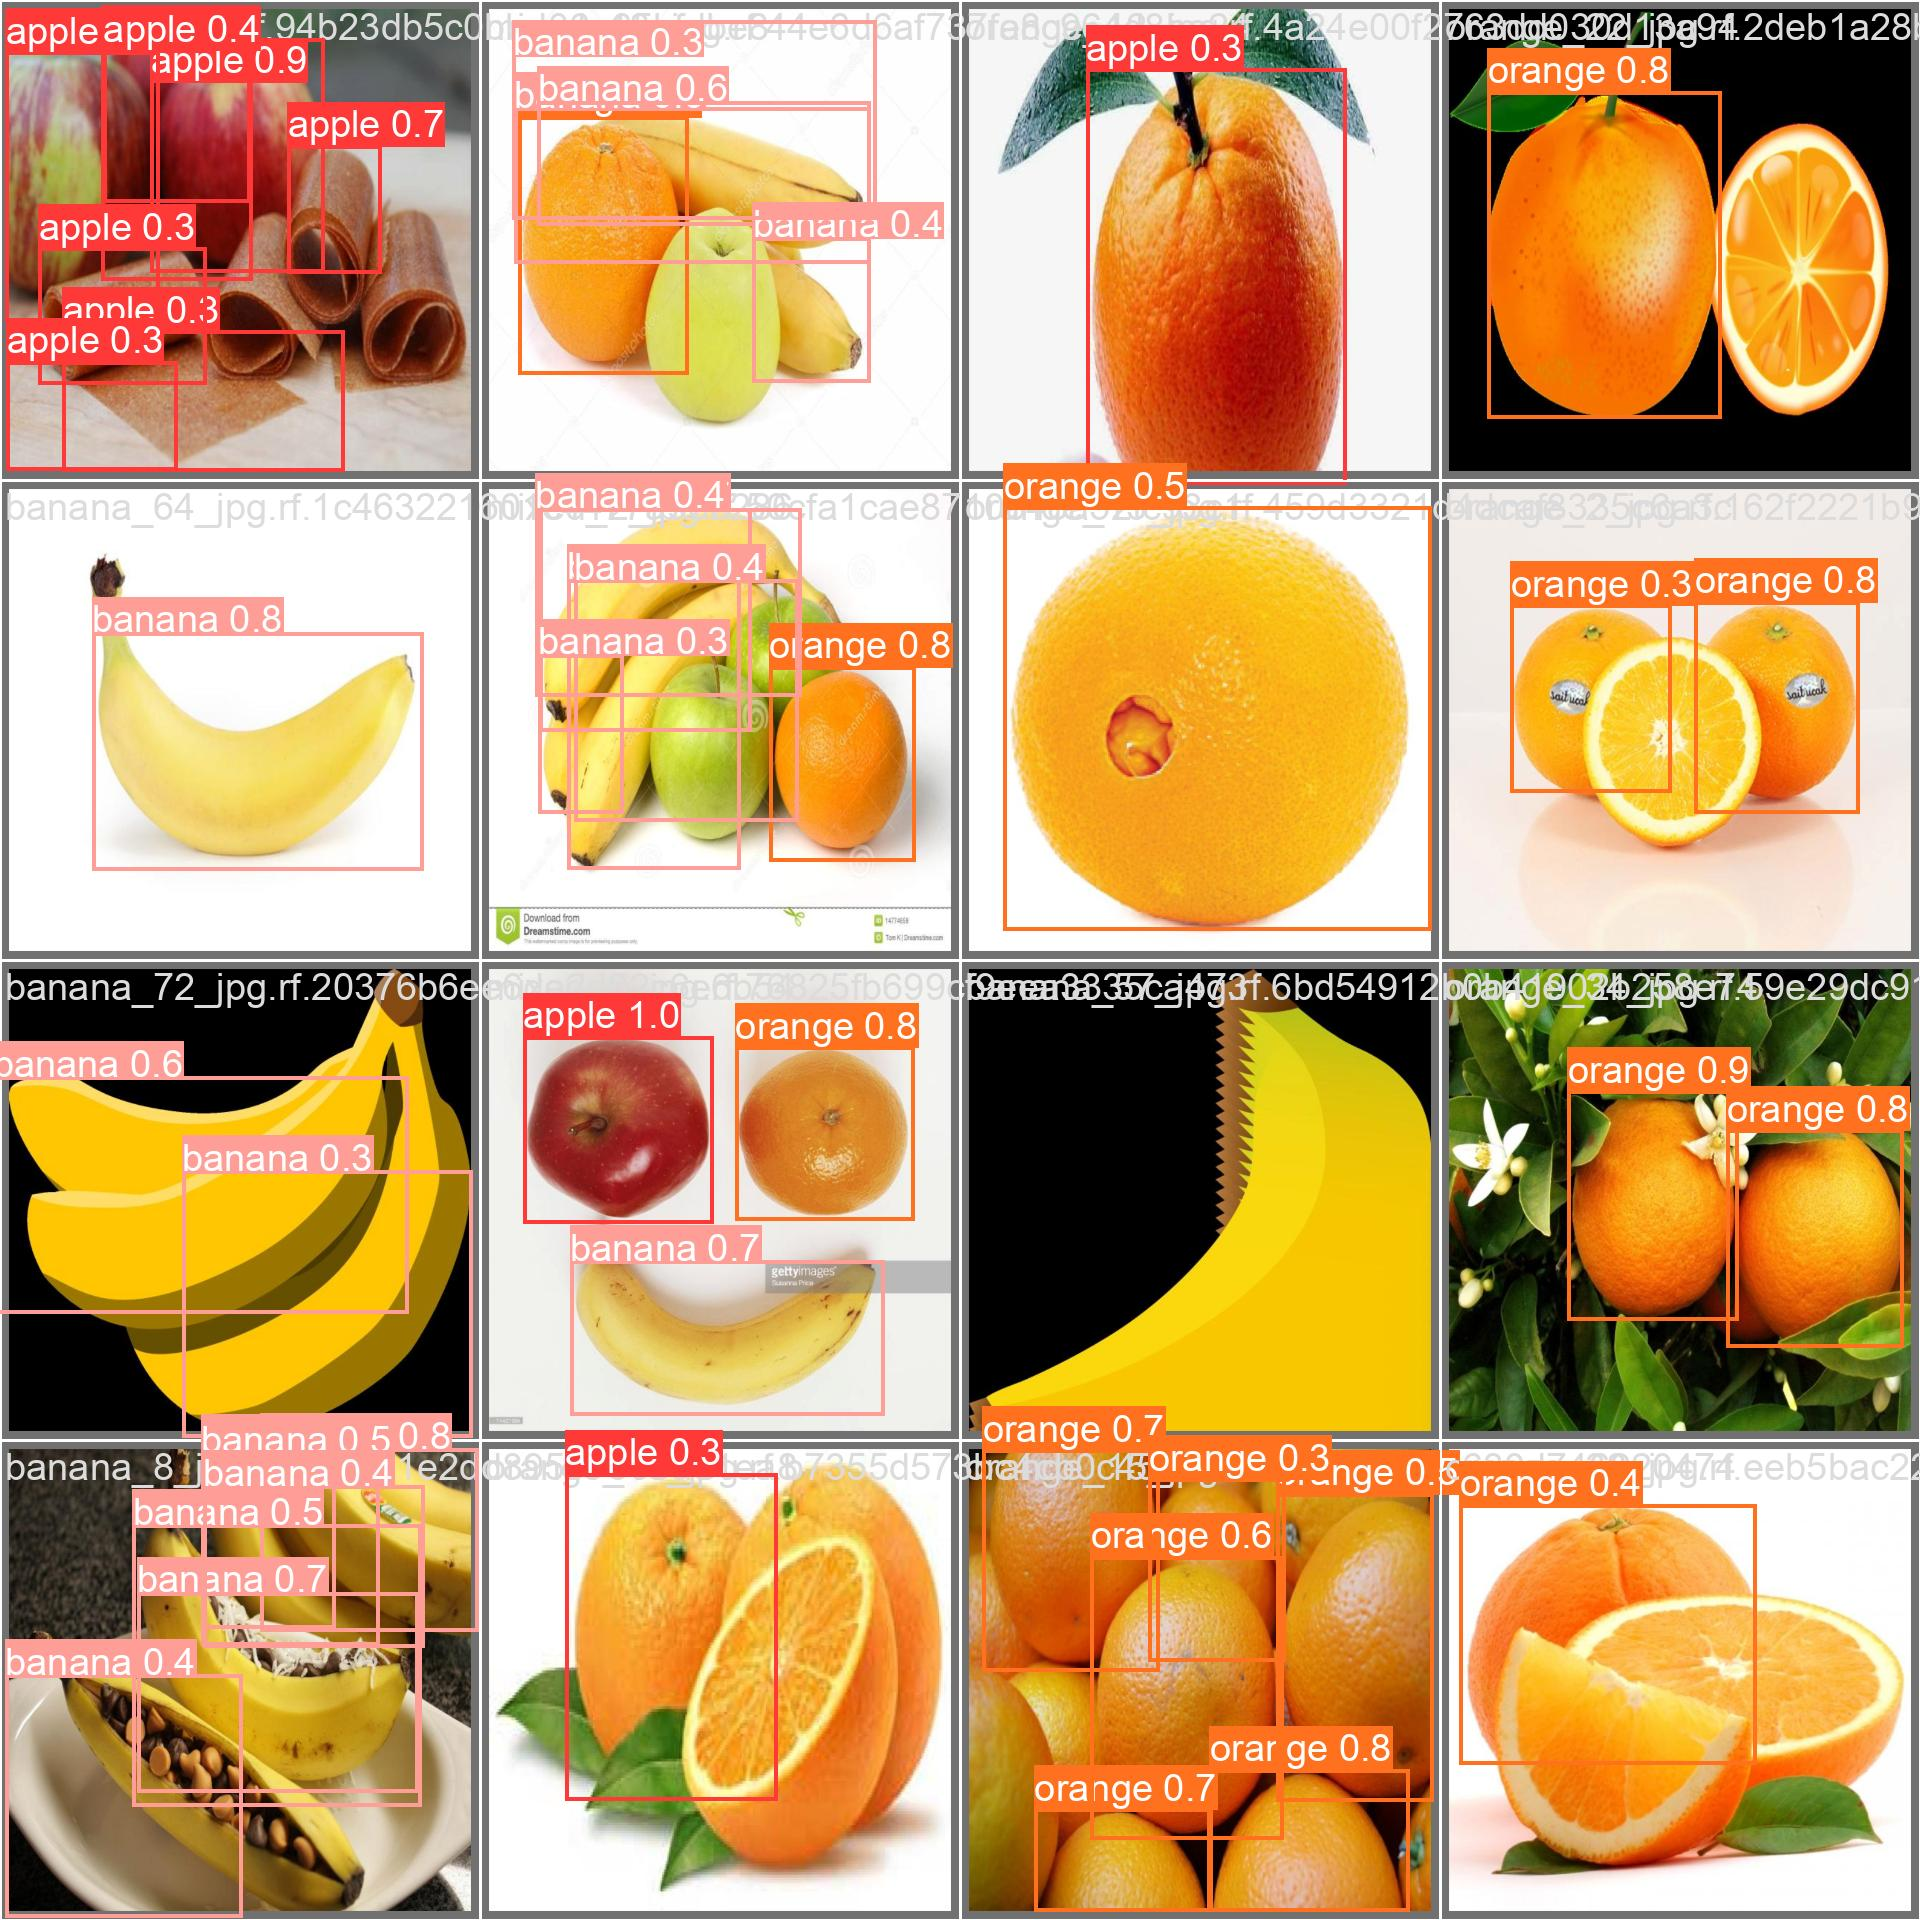

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)